# Gutenberg Titles Dataset with Average MLP
Average MLP analysis with the Gutenberg titles dataset. Using the following configuration:
1. Using pre-trained Google News Group Embeddings
1. Embedding size: 300
1. Hidden layer 1: 200
1. Hidden layer 2: 100
1. Hidden layer 3: 50
1. Top vocabulary count 5,000
1. Adam Learning Rate of 1e-4
1. L2-contraint 0.001

In [1]:
%matplotlib inline

import os
import sys
ai_lit_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir))
print("Loading AI Lit system from path", ai_lit_path)
sys.path.append(ai_lit_path)

import tensorflow as tf

from ai_lit.analysis import analysis_util
from ai_lit.university.gutenberg import gb_title_avg_mlp

Loading AI Lit system from path C:\Users\joewo\workspaces\python\ai_lit


C:\Tools\Anaconda3\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Validation Step
Targets:
[1 0 1 4 1 2 1 1 3 0 2 4 1 2 1 3 0 1 3 3 4 2 2 5 3 0 4 2 3 0 0 3]
Predictions:
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
Loss 1.83302, Acc 0.1875

Testing examples exhausted
Shutting down all network threads
Accuracy: 0.37494140625
F1: 0.139116766379


C:\Tools\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


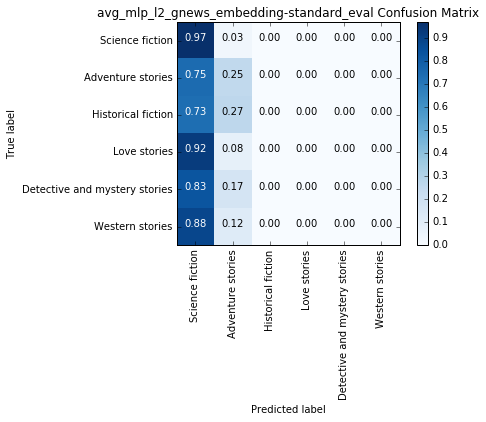

In [2]:
# use the flags imported from the univserity and the model to set the configuration
tf.flags.FLAGS.vocab_count = 5000
tf.flags.FLAGS.embedding_size=300
tf.flags.FLAGS.batch_size = 32
tf.flags.FLAGS.use_pretrained_embeddings = True
# TODO change this to wherever your Google News corpus is stored
tf.flags.FLAGS.pretrained_embedding_model = 'C:/DataSets/word2vec/GoogleNews-vectors-negative300.bin'

dataset_wkspc = os.path.join(ai_lit_path, 'workspace', 'gb_input')
training_wkspc = os.path.join(ai_lit_path, 'workspace', 'gutenberg_titles')
model_name = 'avg_mlp_l2_gnews_embedding'
evaluation_name = 'standard_eval'
univ = gb_title_avg_mlp.GbTitlesAvgMlpUniversity(model_name, training_wkspc, dataset_wkspc)
accuracy, f1, cm = analysis_util.train_and_evaluate(univ, model_name, evaluation_name, save_rate=None, eval_rate=None)